Quick Start
===========

In this tutorial, you will learn how to use our project, to convert a qiskit Quantum Circuit, and then run as adiabatic quantum computation.

First of all, let's take a small example, the Bell state. 

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

We provide a prototype of running the quantum circuit in the interpreter module, so you can directly check the correctness of the conversion/translation.

Simply initialize the gate-based interpreter, and then you can call run() to get the dictionary results. It simplifies the steps of doing it yourself with qiskit. Lastly, you can plot it using qiskit's visualization module.

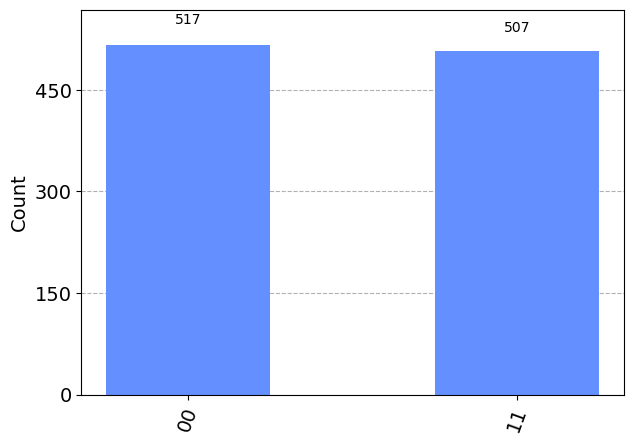

In [2]:
from qiskit.visualization import plot_histogram
from interpreter.gate import GateBasedInterpreter

plot_histogram(GateBasedInterpreter().run(qc))

Now, let's move on our core part: converting the gate-based circuit and run it as AQC. There are some options you can modify, we will use the defaults, see details below.

1. locality (str): Choose which k-local Hamiltonian you want to compute, supports 5- or 3-locaal. Defaults to "5".

2. transpile_to_two (bool): Calling qiskit's transpile method to ensure the input circuit contains 2-qubits only. Defaults to false.

3. info (bool): Print information of the adiabatic program. Defaults to true.

4. end_i (int): Add identity gate to the end of the input circuit, trading computation cost for stablizing the results from AQC. Defaults to 0, i.e. disabled. We will talk about it in the other section.

5. compress (Compress): Compress the input circuit to reduce the number of gates. Defaults to Compress.no. We will talk about it in the other section. 

/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])



*** INFO ***

locality mode = 5
compress mode = no
qubit map = None
# of gates = 2
# of computation qubits (n) = 2
# of clock qubits (L) = 2
# of ending identities = 0

*** END OF INFO ***



  0%|          | 0/4 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:602: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 4/4 [00:00<00:00, 178.23it/s]


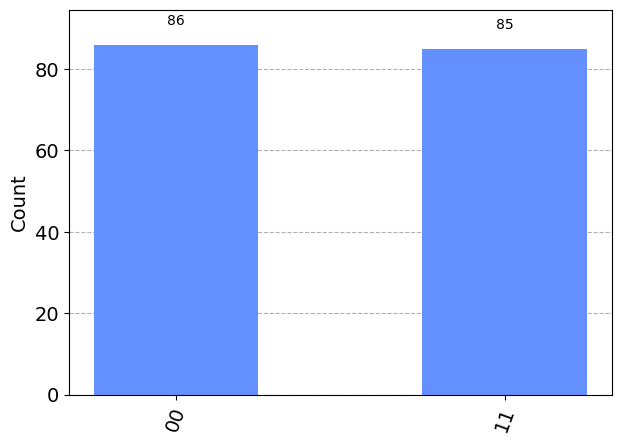

In [3]:
from interpreter.adiabatic import AdiabaticInterpreter

plot_histogram(AdiabaticInterpreter().run(qc))